In [16]:
import pandas as pd
df = pd.read_csv('TestTask2.csv')
print(df.head())

   moderator  id_request         request_time           start_time  \
0        165      159660   2020-09-24 7:01:16  2020-10-01 16:00:31   
1        178      160116  2020-09-24 22:32:15  2020-10-01 13:21:42   
2        187      160178   2020-09-25 2:58:13  2020-10-02 11:37:16   
3        178      160306   2020-09-25 9:44:12   2020-10-02 7:23:09   
4        178      163042  2020-09-30 15:56:08   2020-10-02 7:37:33   

           finish_time       team  
0  2020-10-01 16:02:02     retail  
1  2020-10-01 13:21:43     retail  
2  2020-10-02 11:41:56  wholesale  
3   2020-10-02 7:25:33     retail  
4   2020-10-02 7:47:57     retail  


In [17]:
print(df)

       moderator  id_request         request_time           start_time  \
0            165      159660   2020-09-24 7:01:16  2020-10-01 16:00:31   
1            178      160116  2020-09-24 22:32:15  2020-10-01 13:21:42   
2            187      160178   2020-09-25 2:58:13  2020-10-02 11:37:16   
3            178      160306   2020-09-25 9:44:12   2020-10-02 7:23:09   
4            178      163042  2020-09-30 15:56:08   2020-10-02 7:37:33   
...          ...         ...                  ...                  ...   
35612        117      222193  2020-12-31 21:55:12  2020-12-31 22:06:36   
35613        117      222210  2020-12-31 22:03:21  2020-12-31 22:08:24   
35614        117      222211  2020-12-31 22:03:45  2020-12-31 22:12:08   
35615        117      222213  2020-12-31 22:05:19  2020-12-31 22:12:10   
35616        117      222222  2020-12-31 22:11:17  2020-12-31 22:50:05   

               finish_time       team  
0      2020-10-01 16:02:02     retail  
1      2020-10-01 13:21:43     

In [18]:
unique_teams = df['team'].unique()
print(unique_teams)

['retail' 'wholesale']


C:\Users\PC\AppData\Local\Temp\ipykernel_14152\3084329439.py:52: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\PC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


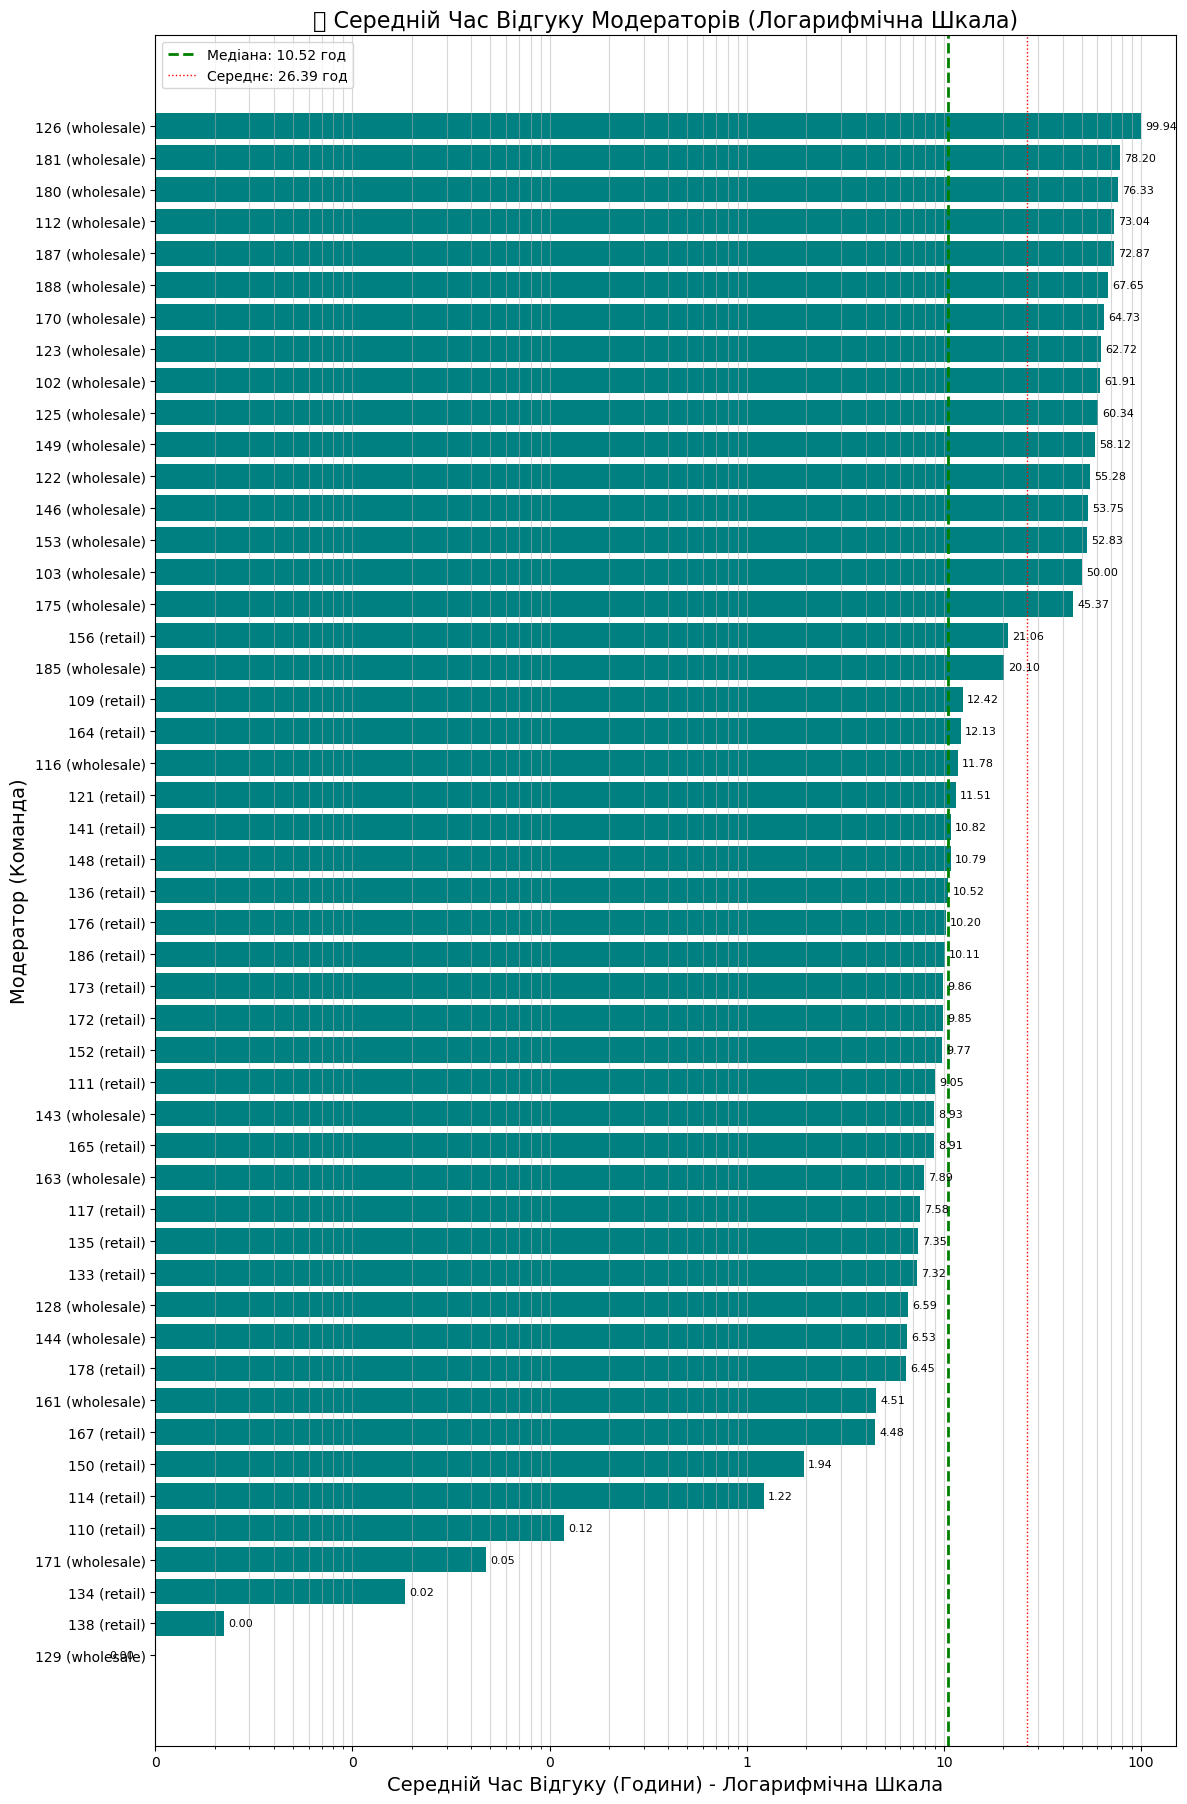

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
time_cols = ['request_time', 'start_time', 'finish_time']
for col in time_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])
df['response_time'] = df['start_time'] - df['request_time']
df['response_time_hours'] = df['response_time'].dt.total_seconds() / 3600
moderator_avg_time = df.groupby(['moderator', 'team'])['response_time_hours'].mean().reset_index()
moderator_avg_time = moderator_avg_time.rename(columns={'response_time_hours': 'avg_response_time_hours'})
moderator_avg_time = moderator_avg_time.sort_values(by='avg_response_time_hours', ascending=False)
median_response = moderator_avg_time['avg_response_time_hours'].median()
overall_avg = moderator_avg_time['avg_response_time_hours'].mean()

data_to_plot = moderator_avg_time
plt.figure(figsize=(12, data_to_plot.shape[0] * 0.35 + 1))
labels = data_to_plot['moderator'].astype(str) + ' (' + data_to_plot['team'] + ')'
bars = plt.barh(labels, data_to_plot['avg_response_time_hours'], color='teal')
plt.xscale('log')
#Налаштування меж логарифмічної осі
min_val = data_to_plot['avg_response_time_hours'].min()
if min_val == 0:
    min_val_positive = data_to_plot[data_to_plot['avg_response_time_hours'] > 0]['avg_response_time_hours'].min()
    if pd.isna(min_val_positive):
        min_val = 1e-4
    else:
        min_val = min_val_positive
plt.xlim(max(1e-3, min_val * 0.5), data_to_plot['avg_response_time_hours'].max() * 1.5)
#Додавання анотацій
for bar in bars:
    width = bar.get_width()
    plt.text(width * 1.05, 
             bar.get_y() + bar.get_height()/2,
             f'{width:.2f}',
             ha='left', 
             va='center', 
             fontsize=8, 
             color='black')
formatter = ScalarFormatter()
formatter.set_scientific(False)
formatter.set_powerlimits((-2, 2))
plt.gca().xaxis.set_major_formatter(formatter)
plt.xlabel('Середній Час Відгуку (Години) - Логарифмічна Шкала', fontsize=14)
plt.ylabel('Модератор (Команда)', fontsize=14)
plt.title('📊 Середній Час Відгуку Модераторів (Логарифмічна Шкала)', fontsize=16)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.5, which='both')
plt.axvline(median_response, color='green', linestyle='dashed', linewidth=2, label=f'Медіана: {median_response:.2f} год')
plt.axvline(overall_avg, color='red', linestyle='dotted', linewidth=1, label=f'Середнє: {overall_avg:.2f} год') 
plt.legend()
plt.tight_layout()
plt.show()

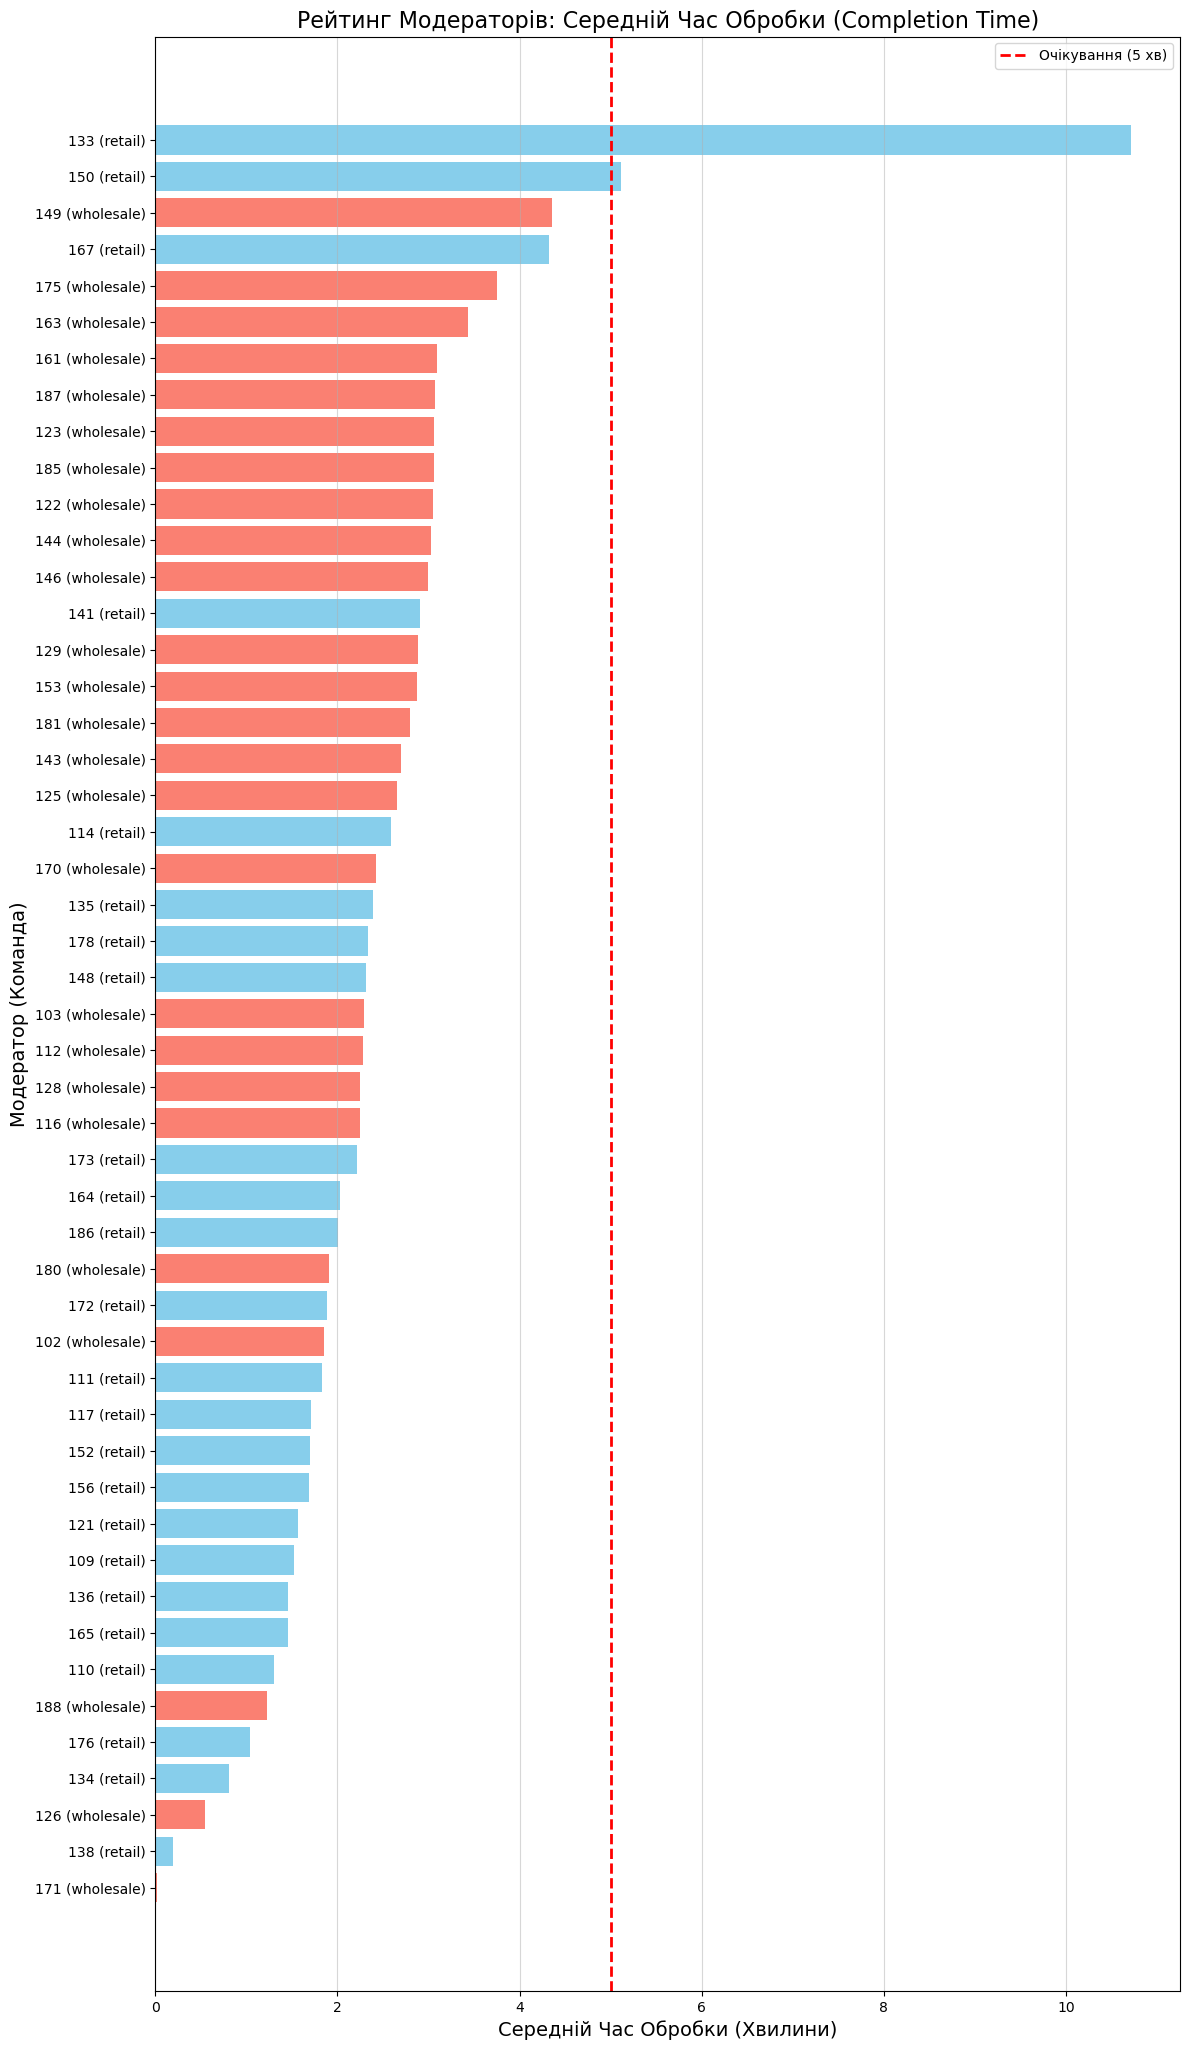


Таблиця середнього часу обробки (Completion Time) для Топ-10 модераторів, які витрачають найбільше часу:
|   moderator | team      |   completion_time_minutes |
|------------:|:----------|--------------------------:|
|         133 | retail    |                     10.72 |
|         150 | retail    |                      5.11 |
|         149 | wholesale |                      4.35 |
|         167 | retail    |                      4.32 |
|         175 | wholesale |                      3.76 |
|         163 | wholesale |                      3.43 |
|         161 | wholesale |                      3.09 |
|         187 | wholesale |                      3.07 |
|         123 | wholesale |                      3.06 |
|         185 | wholesale |                      3.06 |


In [25]:
time_cols = ['request_time', 'start_time', 'finish_time']
for col in time_cols:
    df[col] = pd.to_datetime(df[col])
#Обчислення часу обробки в хвилинах
df['completion_time'] = df['finish_time'] - df['start_time']
df['completion_time_minutes'] = df['completion_time'].dt.total_seconds() / 60
#Обчислення середнього часу обробки для команд
team_avg_time = df.groupby('team')['completion_time_minutes'].mean().sort_values(ascending=False)
#Обчислення середнього часу обробки для модераторів
moderator_avg_time = df.groupby(['moderator', 'team'])['completion_time_minutes'].mean().reset_index()
moderator_avg_time = moderator_avg_time.sort_values(by='completion_time_minutes', ascending=False)
#Створення графіку (топ-30 для читабельності)
data_to_plot = moderator_avg_time.head(100)#Відображаємо топ-30 модераторів з найдовшим часом
N_moderators = len(data_to_plot)
plt.figure(figsize=(12, N_moderators * 0.4 + 1))#Динамічний розмір
#Кольори за командою
colors = data_to_plot['team'].apply(lambda x: 'skyblue' if x == 'retail' else 'salmon')
labels = data_to_plot['moderator'].astype(str) + ' (' + data_to_plot['team'] + ')'
plt.barh(labels, data_to_plot['completion_time_minutes'], color=colors)
#Лінія очікувань менеджменту (5 хвилин)
plt.axvline(5, color='red', linestyle='--', linewidth=2, label='Очікування (5 хв)')
plt.title('Рейтинг Модераторів: Середній Час Обробки (Completion Time)', fontsize=16)
plt.xlabel('Середній Час Обробки (Хвилини)', fontsize=14)
plt.ylabel('Модератор (Команда)', fontsize=14)
plt.gca().invert_yaxis()
plt.legend()
plt.grid(axis='x', alpha=0.5)
plt.tight_layout()
plt.show()
print("\nТаблиця середнього часу обробки (Completion Time) для Топ-10 модераторів, які витрачають найбільше часу:")
print(moderator_avg_time.head(10).to_markdown(index=False, floatfmt=".2f"))

C:\Users\PC\AppData\Local\Temp\ipykernel_14152\3564584645.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\PC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


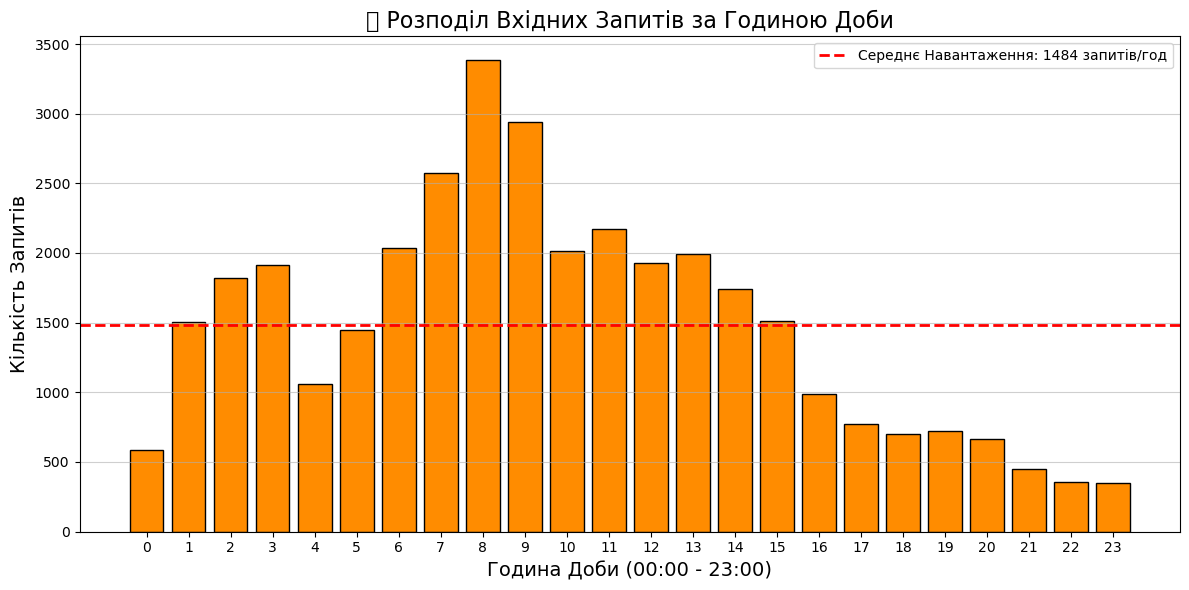


Таблиця кількості запитів за годиною доби (Топ-5 пікових годин):
|   request_hour |   count |
|---------------:|--------:|
|              8 |    3386 |
|              9 |    2940 |
|              7 |    2572 |
|             11 |    2169 |
|              6 |    2039 |


In [9]:
#Перетворення request_time у datetime об'єкт
df['request_time'] = pd.to_datetime(df['request_time'])
#Виділення години доби
# Використовуємо .dt.hour, щоб отримати годину
df['request_hour'] = df['request_time'].dt.hour
#Групування за годиною та підрахунок кількості запитів
hourly_requests = df.groupby('request_hour')['id_request'].count()
hourly_requests = hourly_requests.rename('count')
#Побудова графіка
plt.figure(figsize=(12, 6))
#Побудова вертикальної стовпчастої діаграми
bars = plt.bar(hourly_requests.index, hourly_requests.values, color='darkorange', edgecolor='black')
#Додавання середнього значення як лінії
avg_requests = hourly_requests.mean()
plt.axhline(avg_requests, color='red', linestyle='--', linewidth=2, label=f'Середнє Навантаження: {avg_requests:.0f} запитів/год')
#Налаштування осі X, щоб відображати години доби
plt.xticks(hourly_requests.index)
plt.title('📊 Розподіл Вхідних Запитів за Годиною Доби', fontsize=16)
plt.xlabel('Година Доби (00:00 - 23:00)', fontsize=14)
plt.ylabel('Кількість Запитів', fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.6)
plt.tight_layout()
plt.show()
print("\nТаблиця кількості запитів за годиною доби (Топ-5 пікових годин):")
print(hourly_requests.sort_values(ascending=False).head(5).to_markdown(floatfmt=".0f"))

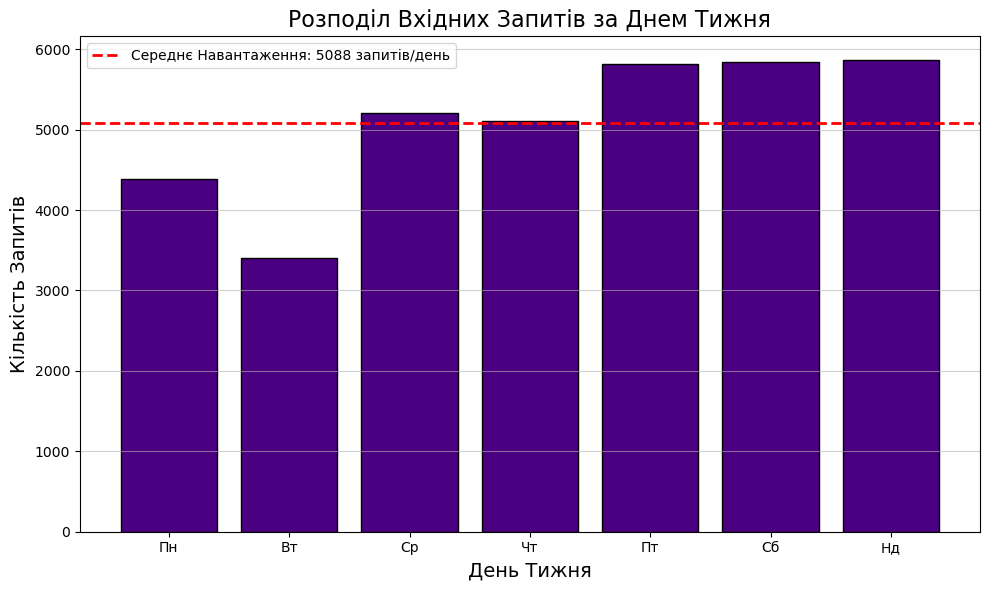


Таблиця кількості запитів за днем тижня:
|    |   count |
|:---|--------:|
| Пн |    4382 |
| Вт |    3398 |
| Ср |    5210 |
| Чт |    5105 |
| Пт |    5818 |
| Сб |    5837 |
| Нд |    5867 |


In [8]:
df['request_time'] = pd.to_datetime(df['request_time'])
#Виділення дня тижня
#.dt.dayofweek повертає 0 для понеділка, 6 для неділі
df['day_of_week'] = df['request_time'].dt.dayofweek
#Підрахунок запитів за днем тижня
requests_by_day = df.groupby('day_of_week')['id_request'].count()
requests_by_day = requests_by_day.rename('count')
#Назви днів тижня для графіка
day_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Нд']
requests_by_day.index = day_names
#Побудова графіка
plt.figure(figsize=(10, 6))
bars = plt.bar(requests_by_day.index, requests_by_day.values, color='indigo', edgecolor='black')
#Додавання середнього значення як лінії
avg_requests = requests_by_day.mean()
plt.axhline(avg_requests, color='red', linestyle='--', linewidth=2, label=f'Середнє Навантаження: {avg_requests:.0f} запитів/день')
plt.title('Розподіл Вхідних Запитів за Днем Тижня', fontsize=16)
plt.xlabel('День Тижня', fontsize=14)
plt.ylabel('Кількість Запитів', fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.6)
plt.tight_layout()
plt.show()
print("\nТаблиця кількості запитів за днем тижня:")
print(requests_by_day.to_markdown(floatfmt=".0f"))

In [ ]:
#Служба Підтримики не відповідає очікуванням менеджменту шо до швидкості реагування.
#Запити лежать днями,навітьтижнями поки їх не почнуть робити
#Як ми бачимо на графіку Рейтінг Модераторів Середній час обрибки запиту не справляються тільки 2 модератора з команди retail більшість модераторів справляются з часом обробки відкука,
#але це не основная проблема де запити лежать днями,навіть тижнями поки їх не почнуть робити
#Так как час відповіді дуже високий я вважаю треба на 100% збільшити команду підтримки та обьеднати у дві команди у одну,
#але об'єднання дозволяє перерозподіляти навантаження з перевантаженої команди (retail або wholesale) на ту, що менш завантажена, що є критичним для зменшення загального часу очікування.
#Замість того, щоб керувати двома окремими графіками, ви керуєте єдиною чергою.
#Графік позує розподіл вхідних запитів за годинами у добу.
#Раджу зробити новий графік роботи нової служби підтримики з щоб більшість модераторів працювали коли навантаження більше за ср навантаження у годину
#Під час розробки нового графіка роботи раджу звертатеся ще до графіка "Розподіл Вхідних запитів за длем тижня" де показано середне навантаження у день та бачимо у які дні навантаження більше за середне.